# Evaluate the Algorithms

# Included Modules and Packages

In [1]:
import neo4j

import csv

import math
import numpy as np
import pandas as pd

import psycopg2

# Neo4j DB Startup

In [2]:
driver = neo4j.GraphDatabase.driver(uri="neo4j://neo4j:7687", auth=("neo4j","ucb_mids_w205"))

In [3]:
session = driver.session(database="neo4j")

# Postgres DB Startup

In [4]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)
cursor = connection.cursor()

# Station Centrality EDA

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
station_scores_eda = pd.read_csv('station_scores.csv')
station_scores_eda.iloc[:5]

,station_name,blue_betweenness,blue_closeness_centrality,blue_degree_centrality,blue_harmonic,blue_wasserman,gray_betweenness,gray_closeness_centrality,gray_degree_centrality,gray_harmonic,gray_wasserman,green_betweenness,green_closeness_centrality,green_degree_centrality,green_harmonic,green_wasserman,orange_betweenness,orange_closeness_centrality,orange_degree_centrality,orange_harmonic,orange_wasserman,red_betweenness,red_closeness_centrality,red_degree_centrality,red_harmonic,red_wasserman,yellow_betweenness,yellow_closeness_centrality,yellow_degree_centrality,yellow_harmonic,yellow_wasserman
0,12th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4986.833333,0.134822,5.0,0.154075,0.103174,2724.833333,0.134711,5.0,0.153544,0.103089,3545.333333,0.135607,5.0,0.153839,0.103775
1,16th Street Mission,1914.333333,0.107237,6.0,0.139981,0.082064,NaN,NaN,NaN,NaN,NaN,2416.166667,0.107804,6.0,0.140121,0.082498,NaN,NaN,NaN,NaN,NaN,1986.333333,0.107591,6.0,0.140628,0.082335,2526.166667,0.108162,6.0,0.140753,0.082772
2,19th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4632.000000,0.127244,5.0,0.145921,0.097375,2568.000000,0.127145,5.0,0.145552,0.097299,3405.000000,0.127943,5.0,0.145909,0.097910
3,24th Street Mission,1952.833333,0.100866,6.0,0.136221,0.077189,NaN,NaN,NaN,NaN,NaN,2436.000000,0.101368,6.0,0.136346,0.077573,NaN,NaN,NaN,NaN,NaN,2028.333333,0.101179,6.0,0.137178,0.077428,2553.833333,0.101684,6.0,0.137289,0.077815
4,Antioch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.000000,0.058760,2.0,0.065522,0.044967


In [7]:
cust_station_eda = pd.read_csv('customers_station_scores.csv')
cust_station_eda.iloc[:5]

,customer_id,first_name,last_name,street,city,state,zip,closest_store_id,closest_store_distance,latitude,longitude,closest_station,closest_station_distance,blue_betweenness,blue_closeness_centrality,blue_degree_centrality,blue_harmonic,blue_wasserman,gray_betweenness,gray_closeness_centrality,gray_degree_centrality,gray_harmonic,gray_wasserman,green_betweenness,green_closeness_centrality,green_degree_centrality,green_harmonic,green_wasserman,orange_betweenness,orange_closeness_centrality,orange_degree_centrality,orange_harmonic,orange_wasserman,red_betweenness,red_closeness_centrality,red_degree_centrality,red_harmonic,red_wasserman,yellow_betweenness,yellow_closeness_centrality,yellow_degree_centrality,yellow_harmonic,yellow_wasserman
0,1,Robb,Weaving,5 Ramsey Place,Oakland,CA,94609,1,1,37.8343,-122.2643,MacArthur,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5584.833333,0.119765,5.0,0.140597,0.091651,3596.333333,0.119677,5.0,0.140327,0.091584,6535.833333,0.120384,5.0,0.140766,0.092125
1,2,Robby,Belliard,6 Londonderry Plaza,Oakland,CA,94609,1,1,37.8343,-122.2643,MacArthur,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5584.833333,0.119765,5.0,0.140597,0.091651,3596.333333,0.119677,5.0,0.140327,0.091584,6535.833333,0.120384,5.0,0.140766,0.092125
2,3,Sadella,Caudrelier,548 Mcguire Parkway,Oakland,CA,94609,1,1,37.8343,-122.2643,MacArthur,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5584.833333,0.119765,5.0,0.140597,0.091651,3596.333333,0.119677,5.0,0.140327,0.091584,6535.833333,0.120384,5.0,0.140766,0.092125
3,4,Holmes,Shimmings,99 Kennedy Court,Oakland,CA,94609,1,1,37.8343,-122.2643,MacArthur,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5584.833333,0.119765,5.0,0.140597,0.091651,3596.333333,0.119677,5.0,0.140327,0.091584,6535.833333,0.120384,5.0,0.140766,0.092125
4,5,Beverley,Gubbin,51 Mcbride Drive,Oakland,CA,94609,1,1,37.8343,-122.2643,MacArthur,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5584.833333,0.119765,5.0,0.140597,0.091651,3596.333333,0.119677,5.0,0.140327,0.091584,6535.833333,0.120384,5.0,0.140766,0.092125


In [8]:
station_popularity = cust_station_eda.value_counts(['closest_station']).reset_index()
station_popularity.columns = ['closest_station','customer_count']
station_popularity.iloc[:5]

,closest_station,customer_count
0,El Cerrito del Norte,831
1,Richmond,538
2,Rockridge,494
3,Civic Center,468
4,Downtown Berkeley,463


In [9]:
scores_eda = pd.merge(station_scores_eda, station_popularity, left_on='station_name', right_on='closest_station',how='left')
scores_eda.set_index("station_name", inplace=True)
scores_eda.iloc[:5]

,blue_betweenness,blue_closeness_centrality,blue_degree_centrality,blue_harmonic,blue_wasserman,gray_betweenness,gray_closeness_centrality,gray_degree_centrality,gray_harmonic,gray_wasserman,green_betweenness,green_closeness_centrality,green_degree_centrality,green_harmonic,green_wasserman,orange_betweenness,orange_closeness_centrality,orange_degree_centrality,orange_harmonic,orange_wasserman,red_betweenness,red_closeness_centrality,red_degree_centrality,red_harmonic,red_wasserman,yellow_betweenness,yellow_closeness_centrality,yellow_degree_centrality,yellow_harmonic,yellow_wasserman,closest_station,customer_count
station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4986.833333,0.134822,5.0,0.154075,0.103174,2724.833333,0.134711,5.0,0.153544,0.103089,3545.333333,0.135607,5.0,0.153839,0.103775,NaN,NaN
16th Street Mission,1914.333333,0.107237,6.0,0.139981,0.082064,NaN,NaN,NaN,NaN,NaN,2416.166667,0.107804,6.0,0.140121,0.082498,NaN,NaN,NaN,NaN,NaN,1986.333333,0.107591,6.0,0.140628,0.082335,2526.166667,0.108162,6.0,0.140753,0.082772,16th Street Mission,198.0
19th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4632.000000,0.127244,5.0,0.145921,0.097375,2568.000000,0.127145,5.0,0.145552,0.097299,3405.000000,0.127943,5.0,0.145909,0.097910,19th Street,337.0
24th Street Mission,1952.833333,0.100866,6.0,0.136221,0.077189,NaN,NaN,NaN,NaN,NaN,2436.000000,0.101368,6.0,0.136346,0.077573,NaN,NaN,NaN,NaN,NaN,2028.333333,0.101179,6.0,0.137178,0.077428,2553.833333,0.101684,6.0,0.137289,0.077815,24th Street Mission,145.0
Antioch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.000000,0.058760,2.0,0.065522,0.044967,NaN,NaN


In [10]:
# score_types = ['degree_centrality','closeness_centrality', 'wasserman', 'harmonic', 'betweenness']
score_types = ['degree_centrality','closeness_centrality', 'betweenness']


for score_type in score_types:
    field_name = 'average' + '_' + score_type
    
    score = [i for i in scores_eda.columns if score_type in i]
    scores_eda[field_name] = scores_eda[score].mean(axis=1, skipna=True)

In [11]:
scores_eda['customer_count'] = scores_eda['customer_count'].astype('Int64')

In [12]:
scores_eda['connected_lines'] = scores_eda[
    ['blue_betweenness','green_betweenness','orange_betweenness','red_betweenness','yellow_betweenness','gray_betweenness']
].notnull().sum(axis=1)

In [13]:
scores_eda['normalized_avg_betweenness'] = (scores_eda['average_betweenness']-scores_eda['average_betweenness'].mean())/scores_eda['average_betweenness'].std()
scores_eda['normalized_avg_closeness'] = (scores_eda['average_closeness_centrality']-scores_eda['average_closeness_centrality'].mean())/scores_eda['average_closeness_centrality'].std()
scores_eda['normalized_avg_degree'] = (scores_eda['average_degree_centrality']-scores_eda['average_degree_centrality'].mean())/scores_eda['average_degree_centrality'].std()

norm_cols = ['normalized_avg_betweenness','normalized_avg_closeness','normalized_avg_degree']
scores_eda['average_all_algos'] = scores_eda[norm_cols].mean(axis=1)

In [14]:
scores_eda = scores_eda[sorted(scores_eda.columns)].sort_values('average_all_algos', ascending=False)

scores_eda_rsr = scores_eda[
    ['customer_count','connected_lines','average_all_algos'] + [col for col in scores_eda.columns if 'norm' in col]
].iloc[:25]
scores_eda_rsr

,customer_count,connected_lines,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,,
West Oakland,203,4,1.511259,1.054325,1.972634,1.506818
MacArthur,385,3,1.357259,2.203271,1.173989,0.694517
Embarcadero,172,4,1.259160,0.529401,1.741261,1.506818
12th Street,<NA>,3,1.225515,1.129838,1.852190,0.694517
Lake Merritt,375,3,1.192010,1.108658,1.772853,0.694517
Montgomery Street,55,4,1.137581,0.423983,1.481941,1.506818
Coliseum,176,4,1.124382,1.022555,1.046847,1.303743
19th Street,337,3,1.059425,0.972915,1.510842,0.694517
Fruitvale,440,3,1.032646,0.963287,1.440135,0.694517


In [15]:
scores_eda_rsr[['customer_count','average_all_algos','normalized_avg_betweenness','normalized_avg_closeness','normalized_avg_degree']].iloc[:10]

,customer_count,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,
West Oakland,203,1.511259,1.054325,1.972634,1.506818
MacArthur,385,1.357259,2.203271,1.173989,0.694517
Embarcadero,172,1.259160,0.529401,1.741261,1.506818
12th Street,<NA>,1.225515,1.129838,1.852190,0.694517
Lake Merritt,375,1.192010,1.108658,1.772853,0.694517
Montgomery Street,55,1.137581,0.423983,1.481941,1.506818
Coliseum,176,1.124382,1.022555,1.046847,1.303743
19th Street,337,1.059425,0.972915,1.510842,0.694517
Fruitvale,440,1.032646,0.963287,1.440135,0.694517


In [16]:
scores_eda_rsr.sort_values('normalized_avg_betweenness', ascending=False).iloc[:15]


,customer_count,connected_lines,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,,
Rockridge,494,1,0.736165,2.398222,0.740356,-0.930084
MacArthur,385,3,1.357259,2.203271,1.173989,0.694517
Orinda,194,1,0.481384,2.028538,0.345698,-0.930084
Lafayette,265,1,0.238935,1.647300,-0.000409,-0.930084
Walnut Creek,306,1,0.006139,1.254510,-0.306008,-0.930084
12th Street,<NA>,3,1.225515,1.129838,1.852190,0.694517
Lake Merritt,375,3,1.192010,1.108658,1.772853,0.694517
West Oakland,203,4,1.511259,1.054325,1.972634,1.506818
Coliseum,176,4,1.124382,1.022555,1.046847,1.303743


In [17]:
scores_eda_rsr.sort_values('normalized_avg_closeness', ascending=False).iloc[:15]

,customer_count,connected_lines,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,,
West Oakland,203,4,1.511259,1.054325,1.972634,1.506818
12th Street,<NA>,3,1.225515,1.129838,1.852190,0.694517
Lake Merritt,375,3,1.192010,1.108658,1.772853,0.694517
Embarcadero,172,4,1.259160,0.529401,1.741261,1.506818
19th Street,337,3,1.059425,0.972915,1.510842,0.694517
Montgomery Street,55,4,1.137581,0.423983,1.481941,1.506818
Fruitvale,440,3,1.032646,0.963287,1.440135,0.694517
Powell Street,131,4,1.016742,0.339505,1.203903,1.506818
MacArthur,385,3,1.357259,2.203271,1.173989,0.694517


In [18]:
scores_eda_rsr.sort_values('normalized_avg_degree', ascending=False).iloc[:15]

,customer_count,connected_lines,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,,
West Oakland,203,4,1.511259,1.054325,1.972634,1.506818
Powell Street,131,4,1.016742,0.339505,1.203903,1.506818
Glen Park,127,4,0.403154,-0.352210,0.054853,1.506818
Balboa Park,157,4,0.484929,0.163327,-0.215357,1.506818
24th Street Mission,145,4,0.627501,0.039858,0.335827,1.506818
Civic Center,468,4,0.863355,0.167659,0.915587,1.506818
16th Street Mission,198,4,0.715943,0.016753,0.624257,1.506818
Montgomery Street,55,4,1.137581,0.423983,1.481941,1.506818
Embarcadero,172,4,1.259160,0.529401,1.741261,1.506818


In [19]:
scores_eda_rsr.sort_values('average_all_algos', ascending=False)

,customer_count,connected_lines,average_all_algos,normalized_avg_betweenness,normalized_avg_closeness,normalized_avg_degree
station_name,,,,,,
West Oakland,203,4,1.511259,1.054325,1.972634,1.506818
MacArthur,385,3,1.357259,2.203271,1.173989,0.694517
Embarcadero,172,4,1.259160,0.529401,1.741261,1.506818
12th Street,<NA>,3,1.225515,1.129838,1.852190,0.694517
Lake Merritt,375,3,1.192010,1.108658,1.772853,0.694517
Montgomery Street,55,4,1.137581,0.423983,1.481941,1.506818
Coliseum,176,4,1.124382,1.022555,1.046847,1.303743
19th Street,337,3,1.059425,0.972915,1.510842,0.694517
Fruitvale,440,3,1.032646,0.963287,1.440135,0.694517


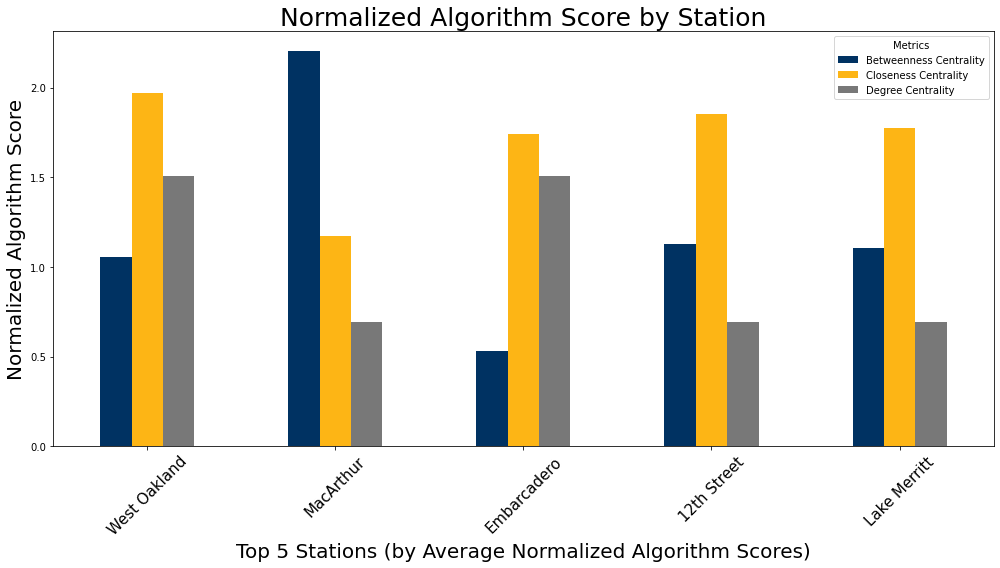

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

top_5 = scores_eda_rsr.sort_values(by='average_all_algos', ascending=False).head(5)

custom_palette = ['#003262', '#fdb515', '#787878']
legend_labels = {
    'normalized_avg_betweenness': 'Betweenness Centrality',
    'normalized_avg_closeness': 'Closeness Centrality',
    'normalized_avg_degree': 'Degree Centrality'
}
fig, ax = plt.subplots(figsize=(14, 8))  # Larger figure size

top_5[['normalized_avg_betweenness', 'normalized_avg_closeness', 'normalized_avg_degree']].plot(kind='bar', width=0.5, ax=ax, linewidth=2, color=custom_palette)

ax.set_xlabel('Top 5 Stations (by Average Normalized Algorithm Scores)', fontsize=20)
ax.set_ylabel('Normalized Algorithm Score', fontsize=20)
ax.set_title('Normalized Algorithm Score by Station', fontsize=25)
ax.set_xticklabels(top_5.index, rotation=45, fontsize=15)  # Rotate x-axis labels for better readability

ax.legend(labels=['Betweenness Centrality', 'Closeness Centrality', 'Degree Centrality'], title='Metrics')

plt.tight_layout()

plt.show()

# What to account for?    
    - Which stations are closest to the most customers?
    - Which stations are connected to more lines?
    - Which graph algorithms are best suited for this problem?
        - Degree Centrality: Number of direct connections a node has in network.
        - Closeness Centrality: How close a node is to all other nodes in network.
        - Betweenness Centrality: Measures extent to which a node lies on shortest paths between other nodes
        - Harmonic Centrality: Sum of reciprocal of shortest path distances from a node to all other nodes in the network.
        - Wasserman Centrality: 

    - Using:
        - degree_centrality
        - closeness_centrality
        - 

    - NOT USING:
        - Harmonic Centrality
        - Betweenness Centrality
        - Wasserman Centrality
    
Details below...
score_types = ['degree_centrality','closeness_centrality', 'wasserman', 'harmonic', 'betweenness']


## Wasserman Centrality Evaluation

In [21]:
degs = [i for i in scores_eda.columns if 'wasserman' in i]
scores_eda[['connected_lines','average_all_algos'] + degs].iloc[:20]

,connected_lines,average_all_algos,blue_wasserman,gray_wasserman,green_wasserman,orange_wasserman,red_wasserman,yellow_wasserman
station_name,,,,,,,,
West Oakland,4,1.511259,0.104821,NaN,0.105531,NaN,0.105263,0.105979
MacArthur,3,1.357259,NaN,NaN,NaN,0.091651,0.091584,0.092125
Embarcadero,4,1.259160,0.100920,NaN,0.101577,NaN,0.101330,0.101993
12th Street,3,1.225515,NaN,NaN,NaN,0.103174,0.103089,0.103775
Lake Merritt,3,1.192010,0.101660,NaN,0.102327,0.101993,NaN,NaN
Montgomery Street,4,1.137581,0.096546,NaN,0.097147,NaN,0.096921,0.097527
Coliseum,4,1.124382,0.090455,0.086323,0.090983,0.090718,NaN,NaN
19th Street,3,1.059425,NaN,NaN,NaN,0.097375,0.097299,0.097910
Fruitvale,3,1.032646,0.096025,NaN,0.096621,0.096322,NaN,NaN


Mainly used for disconnected networks. This is a connected network.

We will not use this algorithm.

## Harmonic Centrality Evaluation

In [22]:
degs = [i for i in scores_eda.columns if 'harmonic' in i]
scores_eda[['connected_lines','average_all_algos'] + degs].iloc[:20]

,connected_lines,average_all_algos,blue_harmonic,gray_harmonic,green_harmonic,orange_harmonic,red_harmonic,yellow_harmonic
station_name,,,,,,,,
West Oakland,4,1.511259,0.159903,NaN,0.160198,NaN,0.159674,0.159922
MacArthur,3,1.357259,NaN,NaN,NaN,0.140597,0.140327,0.140766
Embarcadero,4,1.259160,0.154371,NaN,0.154619,NaN,0.154339,0.154551
12th Street,3,1.225515,NaN,NaN,NaN,0.154075,0.153544,0.153839
Lake Merritt,3,1.192010,0.153784,NaN,0.154140,0.154278,NaN,NaN
Montgomery Street,4,1.137581,0.150246,NaN,0.150458,NaN,0.150370,0.150553
Coliseum,4,1.124382,0.144704,0.13398,0.145261,0.145322,NaN,NaN
19th Street,3,1.059425,NaN,NaN,NaN,0.145921,0.145552,0.145909
Fruitvale,3,1.032646,0.146969,NaN,0.147408,0.147500,NaN,NaN


This algo is scored differently than others because it's the reciprocal of shortest path distances. 

Similar to closeness centrality but takes all paths into account. Accounts for disconnected components, which doesn't apply here.

We will not use this algorithm.

## Betweenness Centrality Evaluation

In [23]:
degs = [i for i in scores_eda.columns if 'between' in i]
scores_eda[['connected_lines','average_all_algos'] + degs].iloc[:20]

,connected_lines,average_all_algos,average_betweenness,blue_betweenness,gray_betweenness,green_betweenness,normalized_avg_betweenness,orange_betweenness,red_betweenness,yellow_betweenness
station_name,,,,,,,,,,
West Oakland,4,1.511259,3647.750000,3251.833333,NaN,4021.666667,1.054325,NaN,3257.500000,4060.000000
MacArthur,3,1.357259,5239.000000,NaN,NaN,NaN,2.203271,5584.833333,3596.333333,6535.833333
Embarcadero,4,1.259160,2920.750000,2622.916667,NaN,3184.083333,0.529401,NaN,2639.583333,3236.416667
12th Street,3,1.225515,3752.333333,NaN,NaN,NaN,1.129838,4986.833333,2724.833333,3545.333333
Lake Merritt,3,1.192010,3723.000000,2696.333333,NaN,3474.333333,1.108658,4998.333333,NaN,NaN
Montgomery Street,4,1.137581,2774.750000,2477.583333,NaN,3023.750000,0.423983,NaN,2507.083333,3090.583333
Coliseum,4,1.124382,3603.750000,3490.000000,644.333333,4514.166667,1.022555,5766.500000,NaN,NaN
19th Street,3,1.059425,3535.000000,NaN,NaN,NaN,0.972915,4632.000000,2568.000000,3405.000000
Fruitvale,3,1.032646,3521.666667,2563.000000,NaN,3348.000000,0.963287,4654.000000,NaN,NaN


This algo is scored differently, and unless we take an average of several algo,it will heavily impact the final score.

We will not use this algorithm.

## Closeness Centrality Evaluation

In [24]:
degs = [i for i in scores_eda.columns if 'closen' in i]
scores_eda[['connected_lines','average_all_algos'] + degs].iloc[:20]

,connected_lines,average_all_algos,average_closeness_centrality,blue_closeness_centrality,gray_closeness_centrality,green_closeness_centrality,normalized_avg_closeness,orange_closeness_centrality,red_closeness_centrality,yellow_closeness_centrality
station_name,,,,,,,,,,
West Oakland,4,1.511259,0.137729,0.136975,NaN,0.137902,1.972634,NaN,0.137553,0.138488
MacArthur,3,1.357259,0.119942,NaN,NaN,NaN,1.173989,0.119765,0.119677,0.120384
Embarcadero,4,1.259160,0.132576,0.131877,NaN,0.132736,1.741261,NaN,0.132413,0.133279
12th Street,3,1.225515,0.135047,NaN,NaN,NaN,1.852190,0.134822,0.134711,0.135607
Lake Merritt,3,1.192010,0.133280,0.132844,NaN,0.133716,1.772853,0.133279,NaN,NaN
Montgomery Street,4,1.137581,0.126801,0.126161,NaN,0.126947,1.481941,NaN,0.126651,0.127443
Coliseum,4,1.124382,0.117110,0.118202,0.112803,0.118891,1.046847,0.118545,NaN,NaN
19th Street,3,1.059425,0.127444,NaN,NaN,NaN,1.510842,0.127244,0.127145,0.127943
Fruitvale,3,1.032646,0.125870,0.125481,NaN,0.126259,1.440135,0.125869,NaN,NaN


High closeness is key. It is an indication that a distribution center located at a station would need to travel less distance to other stops.

## Degree Centrality Evaluation

In [25]:
degs = [i for i in scores_eda.columns if 'deg' in i]
scores_eda[['connected_lines'] + degs].iloc[:10]

,connected_lines,average_degree_centrality,blue_degree_centrality,gray_degree_centrality,green_degree_centrality,normalized_avg_degree,orange_degree_centrality,red_degree_centrality,yellow_degree_centrality
station_name,,,,,,,,,
West Oakland,4,6.00,6.0,NaN,6.0,1.506818,NaN,6.0,6.0
MacArthur,3,5.00,NaN,NaN,NaN,0.694517,5.0,5.0,5.0
Embarcadero,4,6.00,6.0,NaN,6.0,1.506818,NaN,6.0,6.0
12th Street,3,5.00,NaN,NaN,NaN,0.694517,5.0,5.0,5.0
Lake Merritt,3,5.00,5.0,NaN,5.0,0.694517,5.0,NaN,NaN
Montgomery Street,4,6.00,6.0,NaN,6.0,1.506818,NaN,6.0,6.0
Coliseum,4,5.75,6.0,5.0,6.0,1.303743,6.0,NaN,NaN
19th Street,3,5.00,NaN,NaN,NaN,0.694517,5.0,5.0,5.0
Fruitvale,3,5.00,5.0,NaN,5.0,0.694517,5.0,NaN,NaN


There's a strong correlation between degree centrality and connected lines... The more lines a station has, the more connected it is.

It's less complex to just evaluate the connected_lines than to run this algorithm. This algo doesn't add much value.